# How to Solve Numerical Problems in Science with Python

1. Define the problem ***in English*** properly
2. Find a suitable example
    - search it online ***in English*** (www.google.com, www.bing.com, www.baidu.com)
    - seek it in a book
    - ask for it from experts
3. Tweak the example for your goals

# 1. Integration
- 1d
    - with functions (with single and multiple arguments)
    - with arrays
- 2d
    - volume under a surface
    - area of a surface
- Ordinary Differential Equations
    - 1st Order
    - 2nd Order

## 1.1 1d integration

In [84]:
## with functions
from scipy import integrate as spi
spi.quad(np.sin, 0, np.pi/2) # try other functions

## with functions with mutiple arguments
from scipy import integrate as spi

def f_xy(x, y):
    return np.sin(x)*np.cos(y) # try other functions

def int_f_dx(y, z=np.pi/2):
    return spi.quad(f_xy, 0, z, args=(y))

## with arrays
import numpy as np

N_arr = 100000001
a_arr = 0.0
b_arr = np.pi/2
x_arr = np.linspace(a_arr, b_arr, N_arr)
y_arr = np.sin(x_arr)

def simpson_numpy_arr(y, x):
    S = (x[1]-x[0])/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

simpson_numpy_arr(y_arr, x_arr)

0.9999999999999988


## 1.2 2d integration

In [87]:
## volume under a surface
from scipy import integrate as spi

def f(x,y):
    return x*y**2

# scipy.integrate.dblquad(func, a, b, gfun, hfun, args=())

result = spi.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)

print(result)
print(result[0])

(1.3333333333333335, 2.2108134835808843e-14)
1.3333333333333335


- area of a surface
https://tutorial.math.lamar.edu/classes/calciii/SurfaceArea.aspx

\begin{equation}
S = \iint\limits_{D}{{\sqrt {\,{{\left[ {{f_x}} \right]}^2} + {{\left[ {{f_y}} \right]}^2} + 1} \,dA}}
\end{equation}

- numerical methods
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

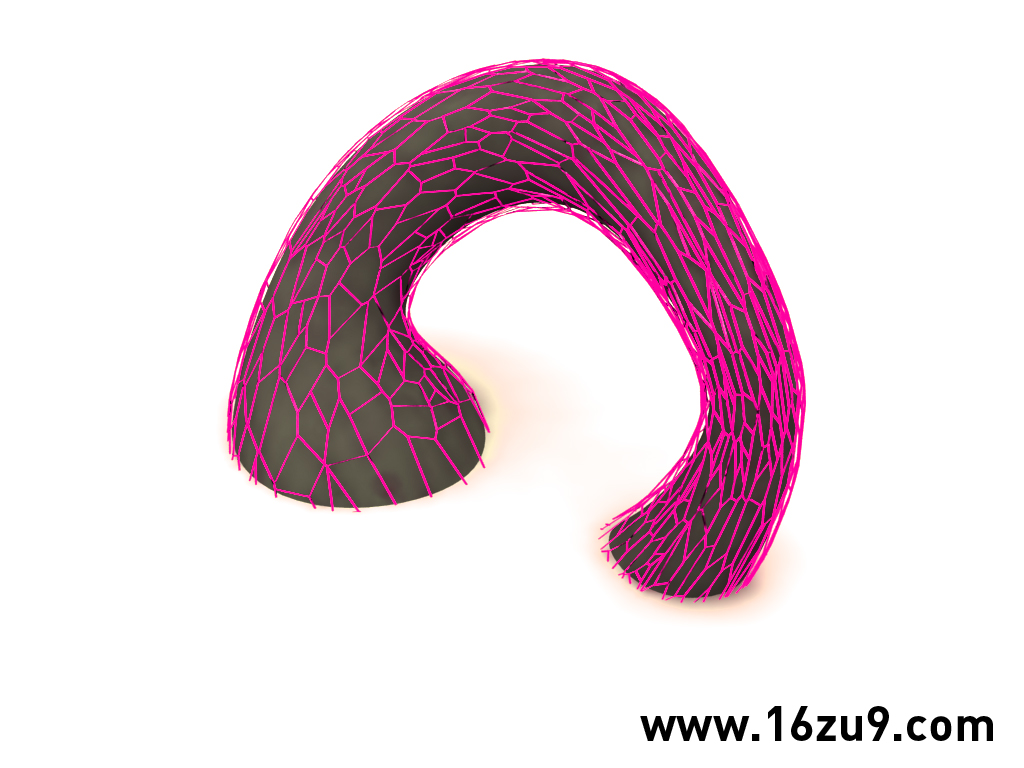

## 1.3 Ordinary Differential Equations

- First-order ordinary differential equations
 > y = scipy.integrate.odeint(model, y0, t)
 
    - model: Function requests y and x values as dydt = model(y,x)
    - y0: Initial conditions
    - x: x positions at which the solution should be reported. 

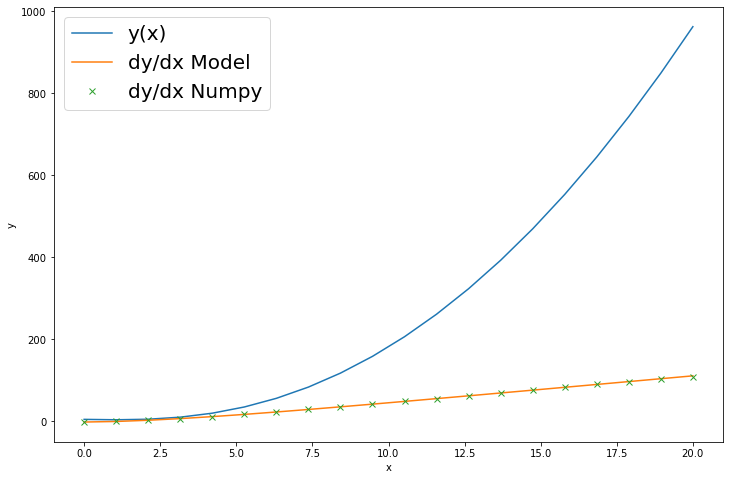

In [92]:
import numpy as np
import scipy.integrate as spi
import pylab as pl

def model(y, x):
    dydx = -0.3 * y + x*x
    return dydx

y0 = 5
xs = np.linspace(0, 20, 20)

# solve ODE
ys = spi.odeint(model, y0, xs)
# calculate y_prime with Model
yc_p = model(ys[:, 0], xs)
# calculate y_prime with Numpy
yc_p_n = np.gradient(ys[:, 0], xs[1]-xs[0], edge_order=1)
# plot results
pl.figure(figsize=(12, 8))
pl.plot(xs, ys[:, 0], 'C0-', label='y(x)')
pl.plot(xs, yc_p, 'C1-', label='dy/dx Model')
pl.plot(xs, yc_p_n, 'C2x', label='dy/dx Numpy')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(fontsize=20)

- Second-order ordinary differential equations

> y″+ 2y′+ 2y = cos(2x)

> y′(0) = 0, y(0) = 0


    1. Turn this into two first-order equations by defining a new depedent variable. For example,

        z ≡ y′
        
        z′+ 2z + 2y = cos(2x)

        z(0) = y(0) = 0
 
    2. olve this system of ODEs using "odeint" with lists, as follows:

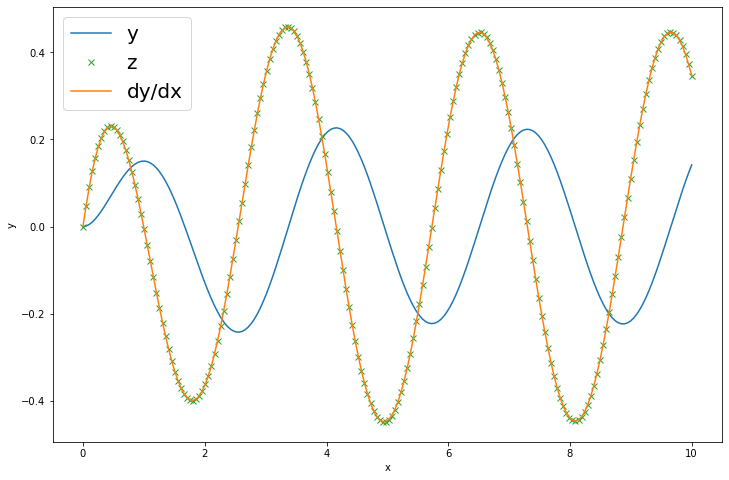

In [94]:
from scipy import integrate as spi

def du_dx(u, x):
    '''
        Here u is a vector such that y=u[0] and z=u[1]. 
        This function should return [y', z'].
    '''
    return [u[1], -2*u[1] - 2*u[0] + np.cos(2*x)]

u0 = [0, 0]
xs = np.linspace(0, 10, 200)
us = spi.odeint(du_dx, u0, xs)
ys = us[:, 0]
zs = us[:, 1]

cs = np.gradient(ys, xs[1]-xs[0], edge_order=2)

pl.figure(figsize=(12,8))
pl.xlabel("x")
pl.ylabel("y")
pl.plot(xs, ys, 'C0-', label="y")
pl.plot(xs, zs, 'C2x', label="z")
pl.plot(xs, cs, 'C1-', label="dy/dx")
pl.legend(fontsize=20)

# 2 Differential
- try numpy.gradients for 2d data by yourself

In [97]:
dx = 0.1
data_test = np.arange(100).reshape((10, 10))
print(data_test)
data_test_diff_2d = np.gradient(data_test, dx)
print(data_test_diff_2d)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100

- differentiate with scipy

In [40]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

# 3 Optimization
Optimization problems in calculus: looking for the largest value or the smallest value that a function can take, which is different from the one in programming.

# 3.1 minimization

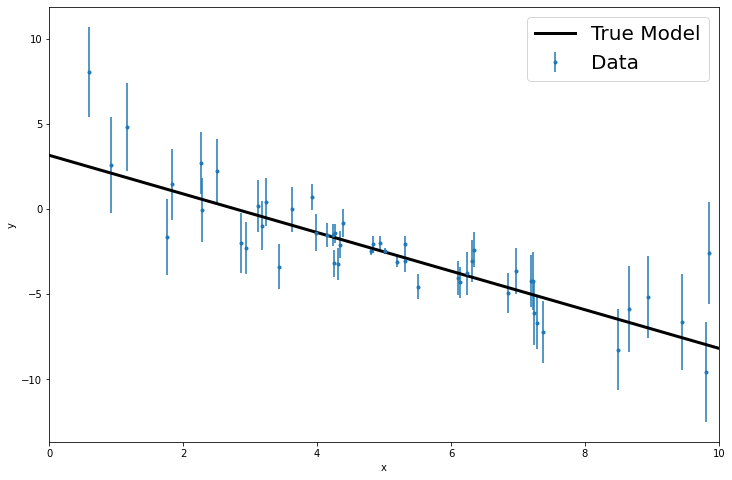

In [61]:
# create mock data
np.random.seed(123)

# Choose the "true" parameters.
m_true = -1.134
b_true = 3.159

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
y = m_true * x + b_true
yerr = 0.1 + 0.5 * np.random.rand(N) + 0.5*np.abs(y-y.mean())
y += yerr*np.random.randn(N)


# visualize the mock data
pl.figure(figsize=(12, 8))
pl.errorbar(x, y, yerr=yerr, fmt=".C0", ecolor="C0", capsize=0, label="Data")
x0 = np.linspace(0, 10, 500)
pl.plot(x0, m_true * x0 + b_true, "k-", alpha=1.0, lw=3, label="True Model")
pl.xlim(0, 10)
pl.xlabel("x")
pl.ylabel("y")
pl.legend(fontsize=20)

In [62]:
# define likelihood function
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.158, (m0 = -1.134})
b = 3.284, (b0 = 3.159})


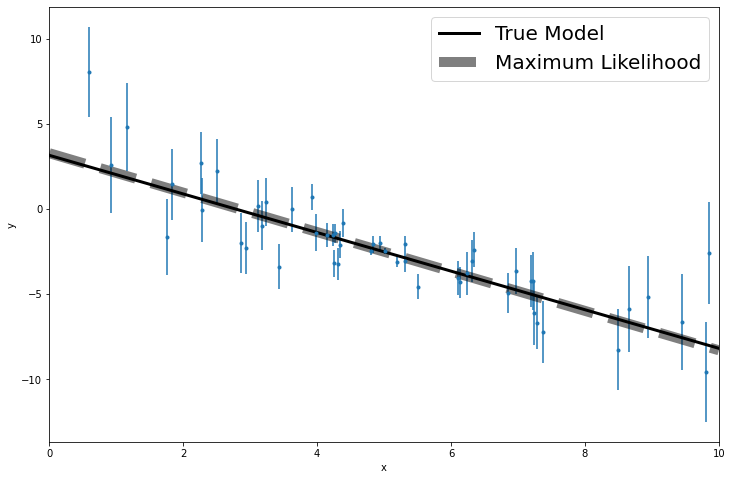

In [63]:
# fit the model using scipy
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x

print("Maximum likelihood estimates:")
print("m = %.3f, (m0 = %.3f})"%(m_ml, m_true))
print("b = %.3f, (b0 = %.3f})"%(b_ml, b_true))

# visualize the results
pl.figure(figsize=(12, 8))
pl.errorbar(x, y, yerr=yerr, fmt=".C0", ecolor="C0", capsize=0)
pl.plot(x0, m_true * x0 + b_true, "-k", lw=3, label="True Model")
pl.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), "--k", lw=10, alpha=0.5, label="Maximum Likelihood")
pl.xlim(0, 10)
pl.xlabel("x")
pl.ylabel("y");
pl.legend(fontsize=20)

## 3.2 curve fitting

`scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None)`

[2.33476164 1.17323678 0.44197388]
[2.29267296 1.         0.37392329]


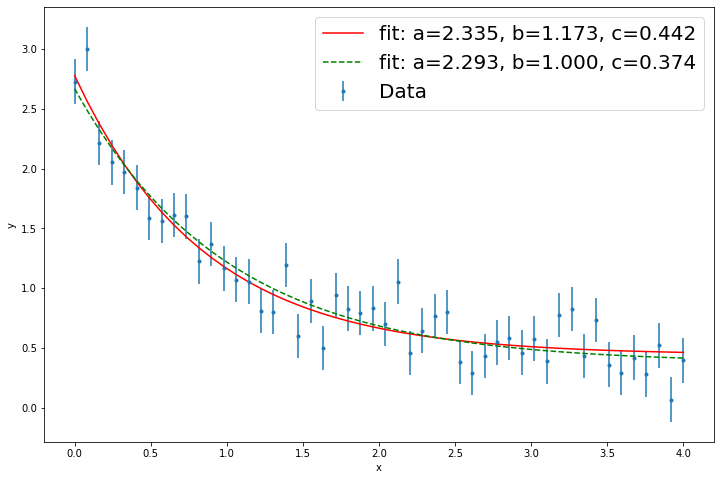

In [77]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

pl.figure(figsize=(12, 8))
pl.errorbar(xdata, ydata, yerr=np.std(y_noise), fmt=".C0", ecolor="C0", capsize=0, label="Data")

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

pl.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)

pl.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

pl.xlabel('x')
pl.ylabel('y')
pl.legend(fontsize=20)

## 3.3 Root-finding

- for a scalar equation

In [99]:
from scipy import optimize
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

sol = optimize.root_scalar(f, x0=0.2, x1 = 1.5, method='secant')

print(sol)
print(sol.root)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1.0
1.0


- for a vector equation

In [100]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]]

from scipy import optimize
sol = optimize.root(fun, [0, 0], method='hybr')

print(sol)
print(sol.x)

    fjac: array([[-0.89914291,  0.43765515],
       [-0.43765515, -0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ 1.19565972e-11, -4.12770392e-12])
       r: array([-2.16690469,  1.03701789, -1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])
[0.8411639 0.1588361]


# 4 interpolation
- 1d, 2d
- linear, Splines
- extropolate `fill_value="extrapolate"`

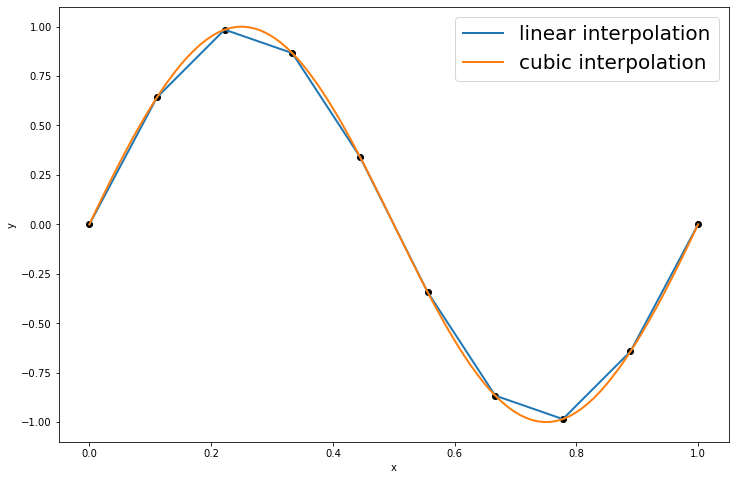

In [31]:
## 1-D interpolation
import numpy as np
import pylab as pl

fine_points = np.linspace(0, 1, 100)
measured_time = np.linspace(0, 1, 10)
measures = np.sin(2 * np.pi * measured_time)

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures, kind='linear') # the return here is a function
cubic_interp = interp1d(measured_time, measures, kind='cubic')

pl.figure(figsize=(12, 8))
pl.plot(measured_time, measures, 'ko')
pl.plot(fine_points, linear_interp(fine_points), 'C0-', lw=2, label="linear interpolation")
pl.plot(fine_points, cubic_interp(fine_points), 'C1-', lw=2, label="cubic interpolation")
pl.xlabel('x')
pl.ylabel('y')
pl.legend(fontsize=20)

Text(0.5, 0, 'z')

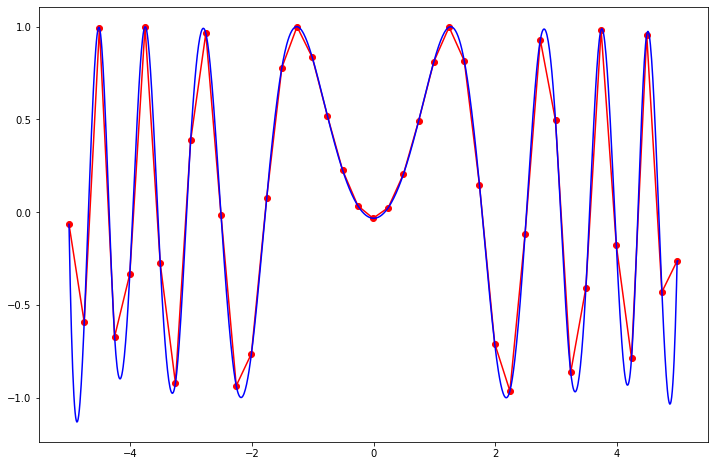

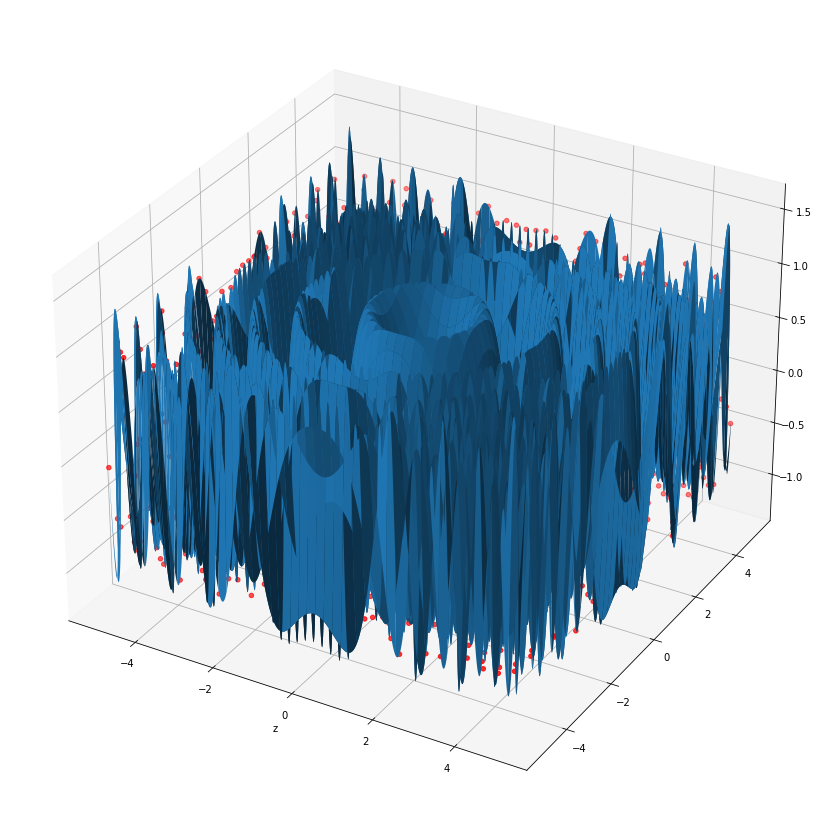

In [39]:
# 2-D interpolation

from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic') # try other kinds of interpolation method such as linear

xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
xxnew, yynew = np.meshgrid(xnew, ynew)

# 2d plot
pl.figure(figsize=(12,8))
pl.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')

# 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, z, marker='o', c='red')
ax.plot_surface(xxnew, yynew, znew)
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')

# 5 An example for N-body Simulation

Author: Philip Mocz (2020) Princeton Univeristy  
Github: @PMocz  
Description: Simulate orbits of stars interacting due to gravity; calculate pairwise forces according to Newton's Law of Gravity

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def getAcc( pos, mass, G, softening ):
    """
    Calculate the acceleration on each particle due to Newton's Law
    pos  is an N x 3 matrix of positions
    mass is an N x 1 vector of masses
    G is Newton's Gravitational constant
    softening is the softening length
    a is N x 3 matrix of accelerations
    """
    # positions r = [x,y,z] for all particles
    x = pos[:,0:1]
    y = pos[:,1:2]
    z = pos[:,2:3]
    # matrix that stores all pairwise particle separations: r_j - r_i
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z
    # matrix that stores 1/r^3 for all particle pairwise particle separations
    inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)
    inv_r3[inv_r3>0] = inv_r3[inv_r3>0]**(-1.5)
    ax = G * (dx * inv_r3) @ mass # numpy.matmul
    ay = G * (dy * inv_r3) @ mass # numpy.matmul
    az = G * (dz * inv_r3) @ mass # numpy.matmul
    # pack together the acceleration components
    a = np.hstack((ax,ay,az))
    return a

def getEnergy( pos, vel, mass, G ):
    """
    Get kinetic energy (KE) and potential energy (PE) of simulation
    pos is N x 3 matrix of positions
    vel is N x 3 matrix of velocities
    mass is an N x 1 vector of masses
    G is Newton's Gravitational constant
    KE is the kinetic energy of the system
    PE is the potential energy of the system
    """
    # Kinetic Energy:
    KE = 0.5 * np.sum(np.sum( mass * vel**2 ))
    # Potential Energy:
    # positions r = [x,y,z] for all particles
    x = pos[:,0:1]
    y = pos[:,1:2]
    z = pos[:,2:3]
    # matrix that stores all pairwise particle separations: r_j - r_i
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z
    # matrix that stores 1/r for all particle pairwise particle separations
    inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
    inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]
    # sum over upper triangle, to count each interaction only once
    PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))
    return KE, PE;


def main():
    """ N-body simulation """
    # Simulation parameters
    N         = 100    # Number of particles
    t         = 0      # current time of the simulation
    tEnd      = 10.0   # time at which simulation ends
    dt        = 0.01   # timestep
    softening = 0.1    # softening length
    G         = 1.0    # Newton's Gravitational Constant
    plotRealTime = True # switch on for plotting as the simulation goes along
    # Generate Initial Conditions
    np.random.seed(17)            # set the random number generator seed
    mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
    pos  = np.random.randn(N,3)   # randomly selected positions and velocities
    vel  = np.random.randn(N,3)
    # Convert to Center-of-Mass frame
    vel -= np.mean(mass * vel,0) / np.mean(mass)
    # calculate initial gravitational accelerations
    acc = getAcc( pos, mass, G, softening )
    # calculate initial energy of system
    KE, PE  = getEnergy( pos, vel, mass, G )
    # number of timesteps
    Nt = int(np.ceil(tEnd/dt))
    # save energies, particle orbits for plotting trails
    pos_save = np.zeros((N,3,Nt+1))
    pos_save[:,:,0] = pos
    KE_save = np.zeros(Nt+1)
    KE_save[0] = KE
    PE_save = np.zeros(Nt+1)
    PE_save[0] = PE
    t_all = np.arange(Nt+1)*dt
    # prep figure
    fig = plt.figure(figsize=(16,20), dpi=80)
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
    ax1 = plt.subplot(grid[0:2,0])
    ax2 = plt.subplot(grid[2,0])
    # Simulation Main Loop
    for i in range(Nt):
        clear_output(wait=True)
        # (1/2) kick
        vel += acc * dt/2.0
        # drift
        pos += vel * dt
        # update accelerations
        acc = getAcc( pos, mass, G, softening )
        # (1/2) kick
        vel += acc * dt/2.0
        # update time
        t += dt
        # get energy of system
        KE, PE  = getEnergy( pos, vel, mass, G )
        # save energies, positions for plotting trail
        pos_save[:,:,i+1] = pos
        KE_save[i+1] = KE
        PE_save[i+1] = PE
        # plot in real time
        if plotRealTime or (i == Nt-1):
            plt.sca(ax1)
            plt.cla()
            xx = pos_save[:,0,max(i-50,0):i+1]
            yy = pos_save[:,1,max(i-50,0):i+1]
            plt.scatter(xx,yy,s=1,color=[.7,.7,1])
            plt.scatter(pos[:,0],pos[:,1],s=10,color='blue')
            ax1.set(xlim=(-2, 2), ylim=(-2, 2))
            ax1.set_aspect('equal', 'box')
            ax1.set_xticks([-2,-1,0,1,2])
            ax1.set_yticks([-2,-1,0,1,2])
            plt.sca(ax2)
            plt.cla()
            plt.scatter(t_all,KE_save,color='red',s=1,label='KE' if i == Nt-1 else "")
            plt.scatter(t_all,PE_save,color='blue',s=1,label='PE' if i == Nt-1 else "")
            plt.scatter(t_all,KE_save+PE_save,color='black',s=1,label='Etot' if i == Nt-1 else "")
            ax2.set(xlim=(0, tEnd), ylim=(-300, 300))
            ax2.set_aspect(0.007)
            plt.pause(0.001)
    # add labels/legend
    plt.sca(ax2)
    plt.xlabel('time')
    plt.ylabel('energy')
    ax2.legend(loc='upper right')
    # Save figure
    saveFig=False
    if saveFig==True:
        plt.savefig('nbody.png',dpi=240)
    return 0

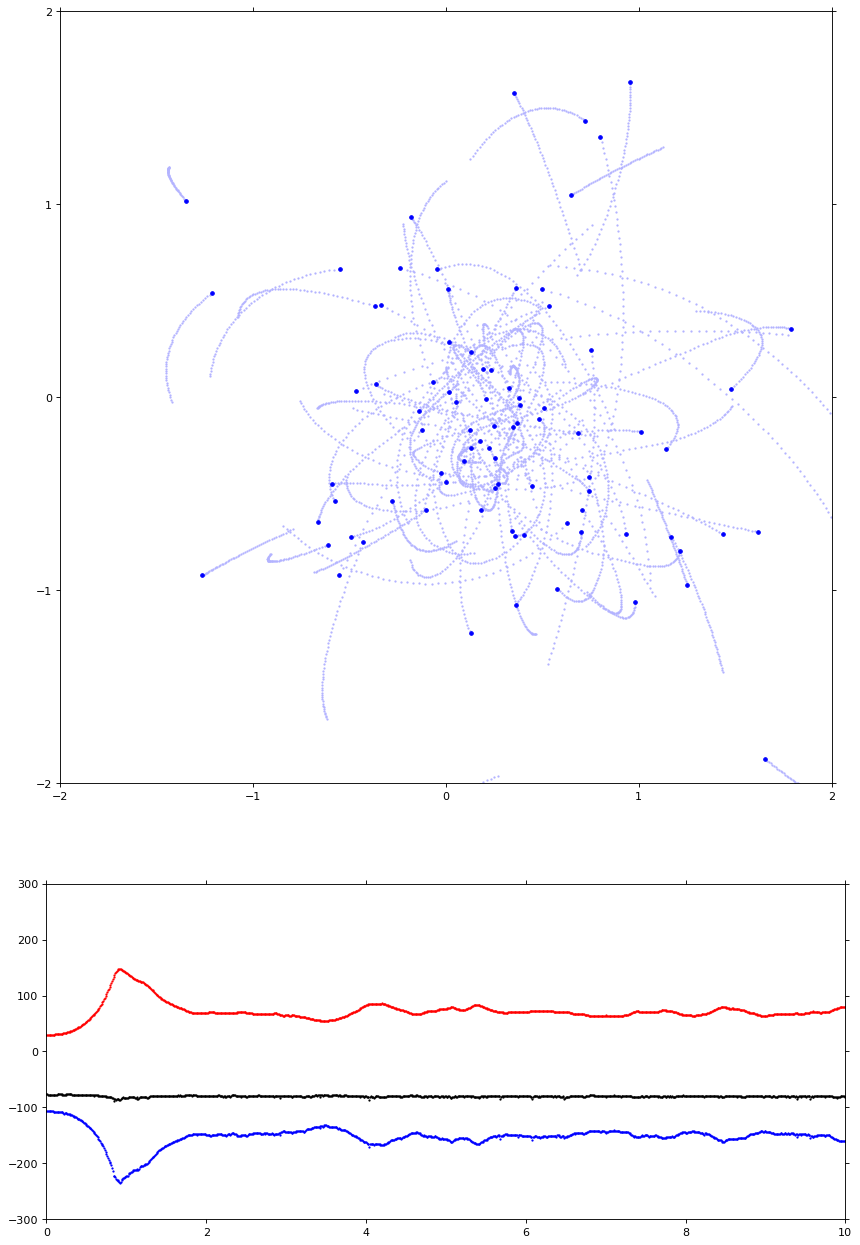

0

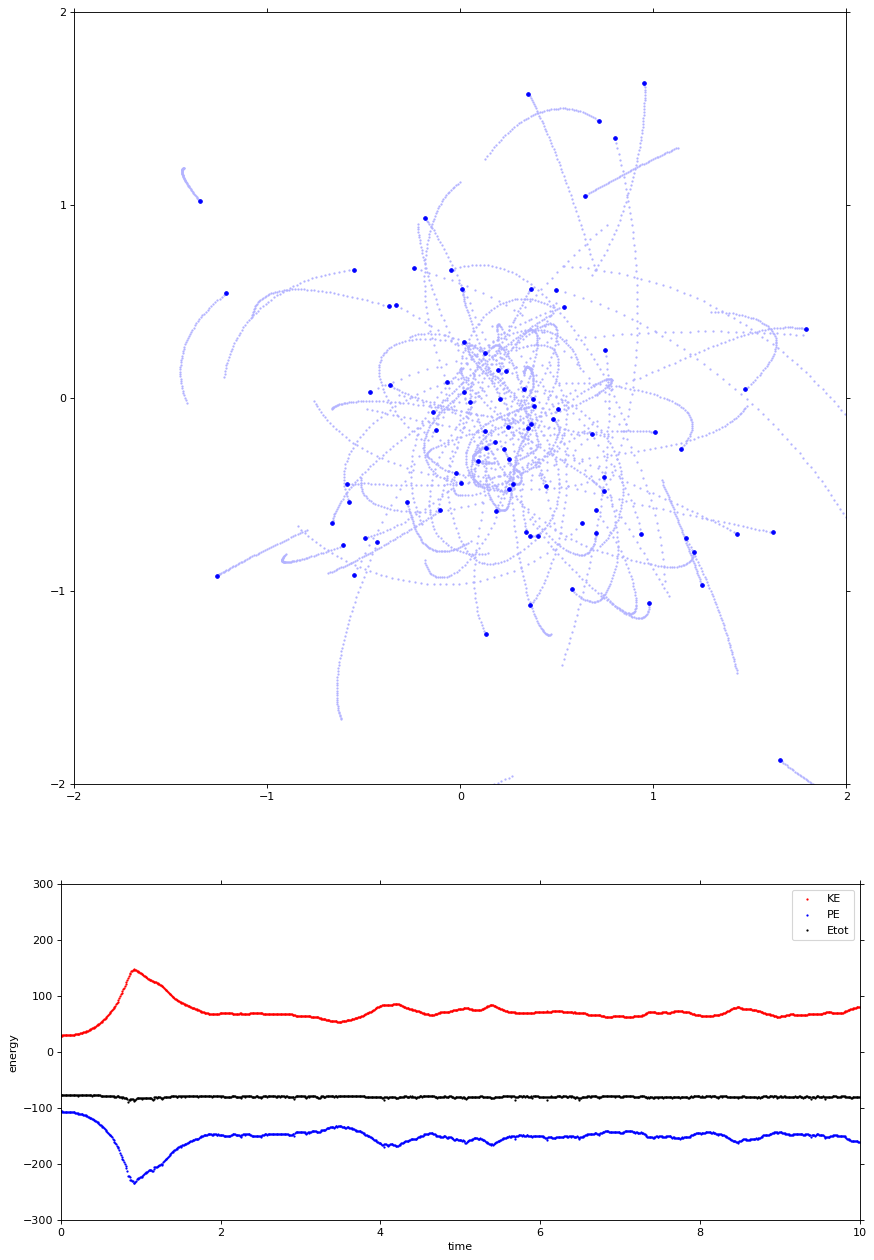

In [83]:
main()

## *Molecular Dynamics simulations in Python